In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
#import ggplot
%load_ext rpy2.ipython
from rpy2.robjects import pandas2ri
pandas2ri.activate()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
def bar_single(x):
    counts = collections.Counter(x)
    plt.bar(list(counts.keys()), list(counts.values()))
def get_ax(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    return ax

In [3]:
df = pd.read_csv('../data_sets/churn.txt')
df['Churn?'] = df['Churn?'].str.contains('True')

In [4]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [5]:
df2 = df[['Int\'l Plan', 'Churn?']]

In [6]:
r_df = pandas2ri.py2ri(df)

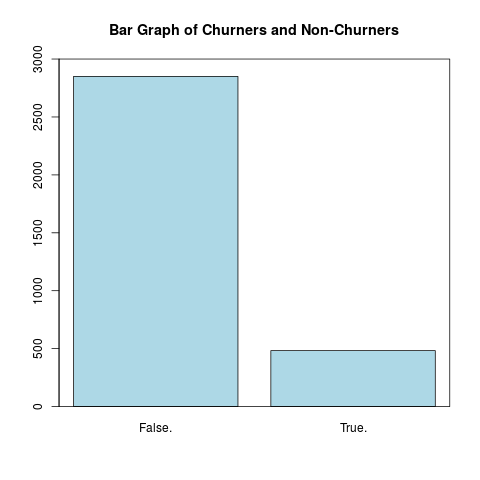

In [7]:
%%R
# Bar chart of variable Churn
churn <- read.csv('../data_sets/churn.txt')
#churn <- r_df
sum.churn <- summary(churn$Churn)
#sum.churn[2:3]
#barplot(c(sum.churn[2:3])
barplot(sum.churn,
ylim = c(0, 3000),
main = "Bar Graph of Churners and Non-Churners",
col = "lightblue")
box(which = "plot", lty = "solid", col="black")

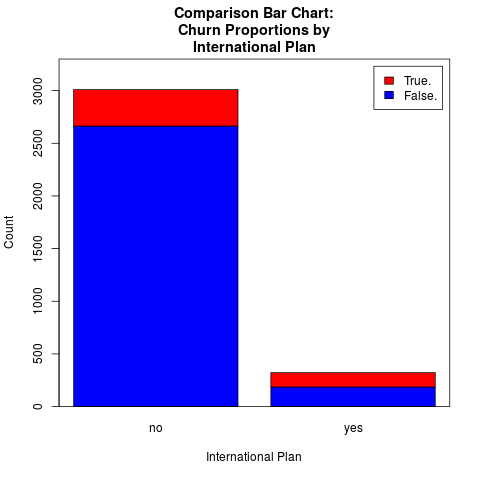

In [8]:
%%R
# Clustered Bar Chart, with legend
#Overlayed bar chart
counts <- table(churn$Churn, churn$Int.l.Plan, dnn=c("Churn", "International Plan"))
barplot(counts,
legend = rownames(counts), 
col = c("blue", "red"),
ylim = c(0, 3300),
ylab = "Count",
xlab = "International Plan", main = "Comparison Bar Chart:
Churn Proportions by
International Plan") 
box(which = "plot", lty = "solid", col="black")

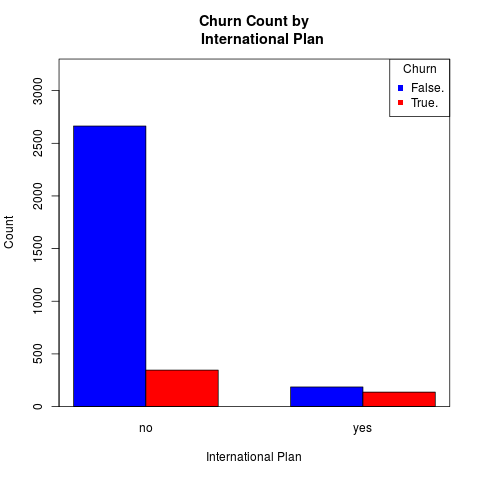

In [9]:
%%R
barplot(counts,
    col = c("blue", "red"),
    ylim = c(0, 3300),
    ylab = "Count",
    xlab = "International Plan", main = "Churn Count by
    International Plan", beside = TRUE)

legend("topright", c(rownames(counts)), col = c("blue", "red"), pch = 15, title = "Churn")

box(which = "plot", lty = "solid", col="black")

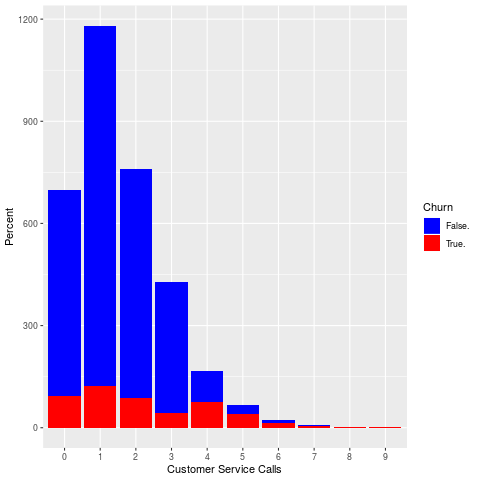

In [10]:
%%R
library(ggplot2)
ggplot() +
geom_bar(data = churn, aes(x = factor(churn$CustServ.Calls), fill = factor(churn$Churn)), position = "stack") + 
scale_x_discrete("Customer Service Calls") +
scale_y_continuous("Percent") + 
guides(fill=guide_legend(title="Churn")) + 
scale_fill_manual(values=c("blue", "red"))

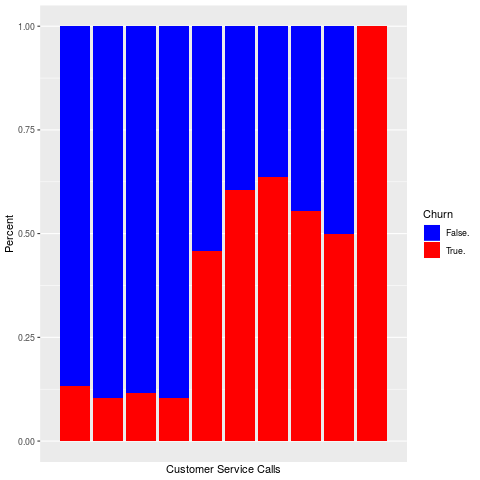

In [11]:
%%R
library(ggplot2)
ggplot() +
geom_bar(data = churn, aes(x = churn$CustServ.Calls, fill = churn$Churn), position = "fill") + 
scale_x_discrete("Customer Service Calls") +
scale_y_continuous("Percent") + 
guides(fill=guide_legend(title="Churn")) + 
scale_fill_manual(values=c("blue", "red"))

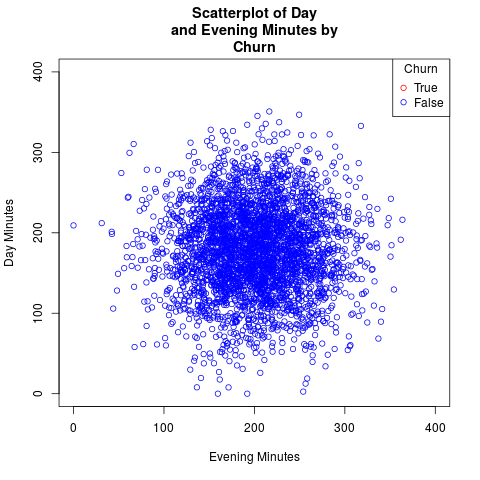

In [12]:
%%R
plot(churn$Eve.Mins, churn$Day.Mins, xlim = c(0, 400), ylim = c(0, 400),
xlab = "Evening Minutes", ylab = "Day Minutes", main = "Scatterplot of Day
and Evening Minutes by
Churn",
col = ifelse(churn$Churn== "True", "red", "blue"))
legend("topright", c("True", "False"), col = c("red",
"blue"), pch = 1,
title = "Churn")

In [13]:
from scipy.stats import ttest_ind
churn_true  = df[df['Churn?']]
churn_false = df[~df['Churn?']]
ttest_ind(churn_true['Int\'l Plan']=='yes', churn_false['Int\'l Plan']=='yes', equal_var=False)

Ttest_indResult(statistic=10.375951051770397, pvalue=4.2837457691116105e-23)

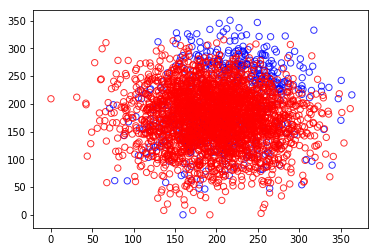

In [14]:
plt.scatter(churn_true['Eve Mins'], churn_true['Day Mins'], s=40, facecolors='none', edgecolors='b', alpha=.8)
plt.scatter(churn_false['Eve Mins'], churn_false['Day Mins'], s=40, facecolors='none', edgecolors='r', alpha=.8)

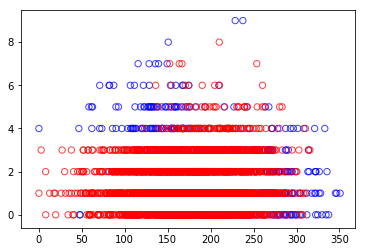

In [15]:
plt.scatter(churn_true['Day Mins'], churn_true['CustServ Calls'], s=40, facecolors='none', edgecolors='b', alpha=.75)
plt.scatter(churn_false['Day Mins'], churn_false['CustServ Calls'], s=40, facecolors='none', edgecolors='r', alpha=.75)

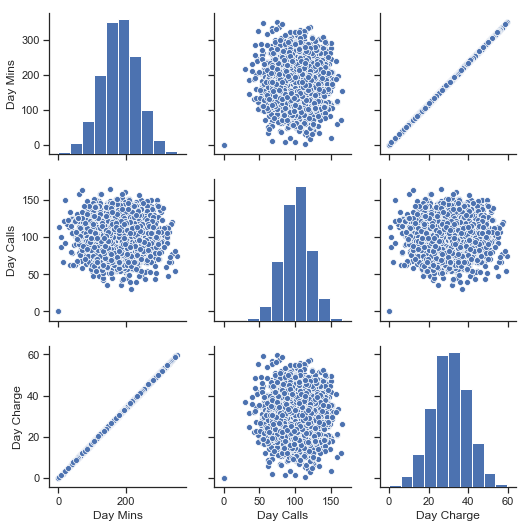

In [16]:
sns.set(style="ticks")
tmp_df = df[['Day Mins', 'Day Calls', 'Day Charge']]
sns.pairplot(tmp_df)

In [17]:
x = df['Day Mins']
y = df['Day Charge']
a, b = np.polyfit(x, y, deg=1)

In [18]:
np.std(a * x + b - y)

0.0028628055872488697

In [19]:
def get_R(y, y_hat, k):
    n = len(y)
    SST = (y-y.mean())
    SST = (SST*SST).sum()
    SSReg = y_hat-y.mean()
    SSReg = (SSReg*SSReg).sum()
    Rsquared = SSReg/SST
    Rsquared_adj = 1- ((1-Rsquared)*(n-1)/(n-k-1))   
    return Rsquared, Rsquared_adj

In [20]:
R2, R2_adj = get_R(y, a*x+b, 1)
print(R2, R2_adj)

0.9999999043808017 0.9999999043520958


In [21]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [22]:
df_tmp = df[['Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'CustServ Calls']]
np.round(df_tmp.corr(), 4)

,Account Length,VMail Message,Day Mins,Day Calls,CustServ Calls
Account Length,1.0000,-0.0046,0.0062,0.0385,-0.0038
VMail Message,-0.0046,1.0000,0.0008,-0.0095,-0.0133
Day Mins,0.0062,0.0008,1.0000,0.0068,-0.0134
Day Calls,0.0385,-0.0095,0.0068,1.0000,-0.0189
CustServ Calls,-0.0038,-0.0133,-0.0134,-0.0189,1.0000


In [23]:
calculate_pvalues(df_tmp) 

,Account Length,VMail Message,Day Mins,Day Calls,CustServ Calls
Account Length,0,0.7894,0.7198,0.0264,0.8266
VMail Message,0.7894,0,0.9642,0.5816,0.444
Day Mins,0.7198,0.9642,0,0.6969,0.4385
Day Calls,0.0264,0.5816,0.6969,0,0.2743
CustServ Calls,0.8266,0.444,0.4385,0.2743,0
